# **This program predicts closing price of stocks.**

# **This is the program for prediction the closing price for heromotocorp**

**Supervised Learning,
Regression task, Batch learning**


In [1]:
!pip install quandl

In [0]:
import math
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
dataframe=quandl.get("BSE/BOM500182", authtoken="K96houAiHzzdXMREh5EZ")

#for further usage we also have given link for asian paints stock you could also check this :

#dataframe=quandl.get("BSE/BOM500820", authtoken="K96houAiHzzdXMREh5EZ") -- this is for asian paints
print(dataframe.head())
print(dataframe.tail())

             Open   High  ...  Spread H-L  Spread C-O
Date                      ...                        
1992-03-02  190.0  210.0  ...        30.0        20.0
1992-03-03  205.0  210.0  ...        15.0        -5.0
1992-03-09  210.0  225.0  ...        15.0        15.0
1992-03-10  215.0  230.0  ...        20.0         5.0
1992-03-11  205.0  220.0  ...        15.0        10.0

[5 rows x 12 columns]
              Open     High  ...  Spread H-L  Spread C-O
Date                         ...                        
2020-03-25  1618.0  1682.95  ...      156.10       52.15
2020-03-26  1690.0  1836.00  ...      189.85      115.30
2020-03-27  1810.0  1836.45  ...      181.45     -149.85
2020-03-30  1655.0  1655.00  ...      113.55     -103.20
2020-03-31  1600.0  1633.45  ...       69.45       -5.80

[5 rows x 12 columns]


In [4]:
print('No of rows, No of columns are:',end="")
print(dataframe.shape)

No of rows, No of columns are:(5992, 12)


In [5]:
print(dataframe.dtypes)
#these are my independent variables

Open                         float64
High                         float64
Low                          float64
Close                        float64
WAP                          float64
No. of Shares                float64
No. of Trades                float64
Total Turnover               float64
Deliverable Quantity         float64
% Deli. Qty to Traded Qty    float64
Spread H-L                   float64
Spread C-O                   float64
dtype: object


In [6]:
#complete information of my dataset is:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5992 entries, 1992-03-02 to 2020-03-31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5992 non-null   float64
 1   High                       5992 non-null   float64
 2   Low                        5992 non-null   float64
 3   Close                      5992 non-null   float64
 4   WAP                        5992 non-null   float64
 5   No. of Shares              5992 non-null   float64
 6   No. of Trades              5992 non-null   float64
 7   Total Turnover             5992 non-null   float64
 8   Deliverable Quantity       4500 non-null   float64
 9   % Deli. Qty to Traded Qty  4500 non-null   float64
 10  Spread H-L                 5992 non-null   float64
 11  Spread C-O                 5992 non-null   float64
dtypes: float64(12)
memory usage: 608.6 KB


In [7]:
dataframe.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5.992000e+03,5992.000000,5.992000e+03,4.500000e+03,4500.000000,5992.000000,5992.000000
mean,1442.197447,1461.209671,1420.752762,1440.131392,1439.481266,7.791060e+04,1972.229473,7.691987e+07,4.354346e+04,37.578342,40.456909,-2.066055
std,1048.776788,1058.185616,1036.523176,1046.204353,1048.597546,1.376763e+05,2467.898531,1.906369e+08,9.691639e+04,19.797344,34.924114,32.136014
min,123.000000,123.950000,116.000000,116.800000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.230000e+02,0.820000,0.000000,-405.400000
25%,577.000000,587.250000,569.375000,577.487500,576.786044,1.561900e+04,651.000000,2.096299e+07,5.250250e+03,22.610000,15.687500,-13.850000
50%,975.500000,990.000000,955.325000,974.875000,972.106846,3.297900e+04,1467.000000,4.542725e+07,1.239300e+04,33.100000,32.275000,-1.200000
75%,2138.250000,2170.850000,2110.937500,2141.000000,2144.843686,7.939875e+04,2529.000000,8.663111e+07,4.347775e+04,48.520000,55.000000,9.800000
max,4200.000000,4200.000000,3996.550000,4047.300000,4051.620000,3.085587e+06,80793.000000,8.138679e+09,2.427734e+06,100.000000,483.150000,346.750000


In [8]:
print(dataframe['Deliverable Quantity'])

Date
1992-03-02        NaN
1992-03-03        NaN
1992-03-09        NaN
1992-03-10        NaN
1992-03-11        NaN
               ...   
2020-03-25     5885.0
2020-03-26     6103.0
2020-03-27    22738.0
2020-03-30    10197.0
2020-03-31     4934.0
Name: Deliverable Quantity, Length: 5992, dtype: float64


In [9]:
#dealing with null values in %  Deli. Qty to Traded Qty and Deliverable Quantity 
#1.remove data points which contain null
aoption=dataframe.dropna(subset=["% Deli. Qty to Traded Qty"],inplace=True)
dataframe.shape

(4500, 12)

In [0]:
%matplotlib inline

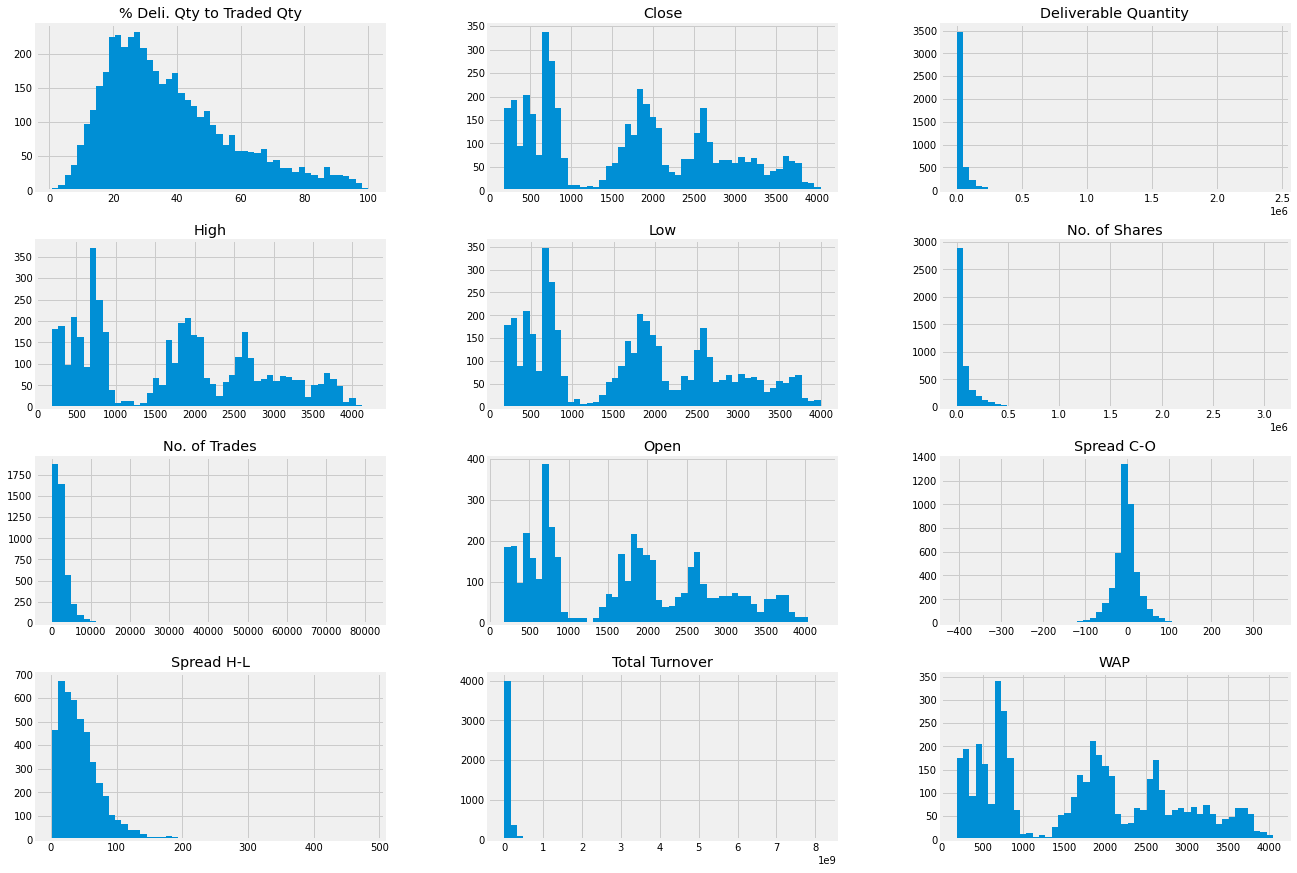

In [11]:
dataframe.hist(bins=50,figsize=(20,15))
plt.show()

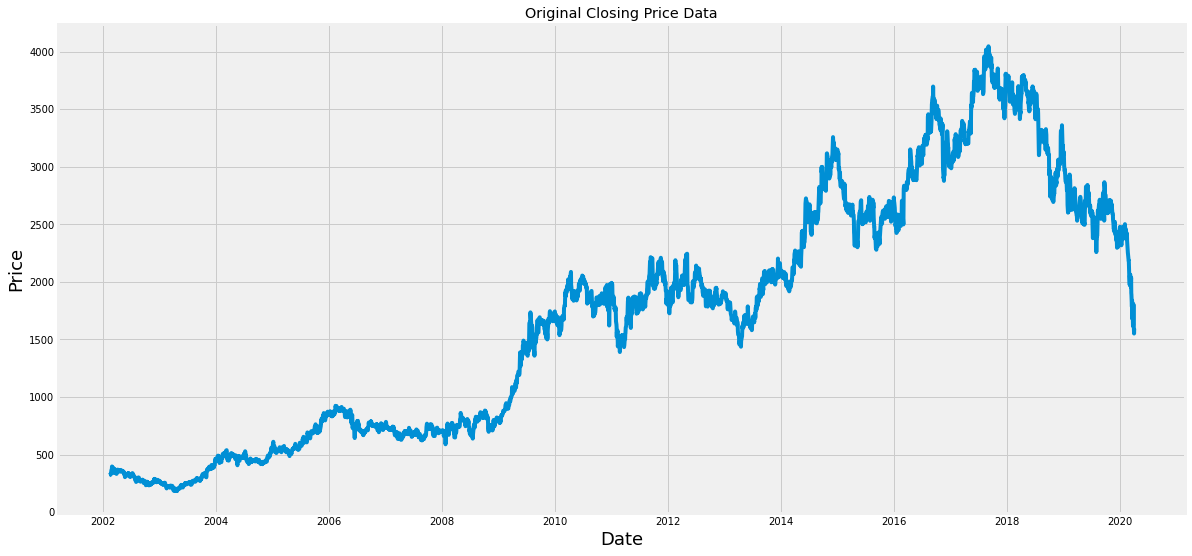

In [12]:
#lets visualize our closing price

plt.figure(figsize=(18,9))
plt.title('Original Closing Price Data')
plt.plot(dataframe['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [13]:
dataframe=dataframe[['Close']]#getting the close price,,close is our independent variable
print(dataframe.head())
print(dataframe.tail())

             Close
Date              
2002-02-08  319.50
2002-02-15  323.55
2002-02-18  334.70
2002-02-19  331.25
2002-02-20  337.75
              Close
Date               
2020-03-25  1670.15
2020-03-26  1805.30
2020-03-27  1660.15
2020-03-30  1551.80
2020-03-31  1594.20


In [21]:
# give here the predicting variable for how many days u want to find
n=int(input("enter here for how many days u want to predict : "))
forcasting=n


enter here for how many days u want to predict : 360


In [22]:
#creating another variable(prediction which will be used for predicting) it is dependent variable , in this we shifted n units up
dataframe["Prediction"]=dataframe[["Close"]].shift(-forcasting) #write inplace of -1 where for the no of days u want to predict
print(dataframe.head())
print(dataframe.tail())

              Close  Prediction
Date                           
2018-10-11  2866.75     2467.80
2016-04-25  2967.40     2734.20
2012-10-05  1810.75     1541.90
2004-07-20   436.00      804.65
2010-12-07  1787.40      335.40
              Close  Prediction
Date                           
2019-12-17  2302.95         NaN
2003-12-31   448.85         NaN
2014-07-14  2452.25         NaN
2017-04-21  3204.90         NaN
2005-07-20   615.00         NaN


In [23]:
#now creating the independent dataset(X)
#convert the dataframe into numpy array
#as we want only independent variables so we are dropping prediction as it was dependent
X=np.array(dataframe.drop(['Prediction'],1))
#remove the last 'n' row i.e. forcasting value
X=X[:-forcasting]#we removed the data which is to be forecast(predicted)
print(X)#this is a list of list

[[2866.75]
 [2967.4 ]
 [1810.75]
 ...
 [ 581.2 ]
 [2893.3 ]
 [ 698.65]]


In [24]:
#now creating the dependent variable dataset which also contains null values(i.e. nan's)
Y=np.array(dataframe['Prediction'])
#in y also i am getting all values except last values which is to be predicted
Y=Y[:-forcasting]
print(Y)#this is a list # i think here we have started training our data with previous values

[2467.8  2734.2  1541.9  ... 2452.25 3204.9   615.  ]


In [26]:
#now as usual we are putting 80% data to training and 20% to testing
#reference here is sklearn documentation
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


[[ 228.6 ]
 [2441.25]
 [ 773.25]
 ...
 [2000.05]
 [2066.3 ]
 [ 646.4 ]]
[[ 228.6 ]
 [2441.25]
 [ 773.25]
 ...
 [2000.05]
 [2066.3 ]
 [ 646.4 ]]


In [0]:
#as it is a regression type of problem so 
#we are using support vector machine(regressor) to train our model 
svr_rbf= SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf.fit(x_train,y_train) 

In [0]:
#testing our model
#the best possible score our model can give is 1.0
#score returns the coefficient of determination R^2 of the prediction
svm_confidence=svr_rbf.score(x_test,y_test)
print("your score is :",svm_confidence)
#if ur score is near .9 means it is a great model

# **It seems a great score, means we trained our model in right way**

In [0]:
#create and train the linear regression model
classifierlinearregression  = LinearRegression()
#training the model
classifierlinearregression.fit(x_train,y_train)

In [0]:
clr_confidence=classifierlinearregression.score(x_test,y_test)
print("your score is :",clr_confidence)

# **It seems from here if we in this model linear regression is working more accurately.**

In [0]:
#set x_forecast equal to the last forcasting rows of the  original data set from Close column
x_forecast=np.array(dataframe.drop(['Prediction'],1))[-forcasting:]
print(x_forecast) 
#this is the original data which contains only last values not in X

In [0]:
import itertools

merged = list(itertools.chain(*x_forecast))
print(merged)
#this is done for a simple list instead of list of list

In [0]:
## now look at the prediction (for the days which we put in forcasting variables)
#now we want to compare the last x_forecast that is our original to the predicted value by model
#printing the predicted values for the same 
#using linear regression 
lr_prediction =classifierlinearregression .predict(x_forecast)
print(lr_prediction)
print("")


In [0]:
#using support vector regressor
svr_prediction =svr_rbf.predict(x_forecast)
print(svr_prediction) 

***Future scope is using Correlation we could remove outliers and could come up with better model***